In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

%matplotlib inline
plt.style.use('classic')

In [2]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

The background evolution equations are 
\begin{align}
    0 & = \frac{d\varepsilon_0}{d\tau} + \frac{1}{\tau}(1+c_s^2)\varepsilon_0
    -\frac{1}{\tau} \pi_0 \\
    %
    0 & = \frac{d\pi_0}{d\tau} + \frac{1}{\tau_\pi}\pi_0
    + \frac{1+c_s^2}{\tau}\pi_0
    - \frac{4}{5\tau}c_s^2\varepsilon_0.
\end{align}
Here $\tau_{\pi,0} = 5\bar{\eta}_0/T_0$ where $\bar{\eta}_0 = \eta_0/\mathcal{S}_0$ is a constant and $\mathcal{S}_0$ is
the background entropy density.
$T_0$ is the temperature, and is related to the energy density by $T_0 = \sqrt[4]{\pi^2 \varepsilon_0 /3g}$, where 
$$ 
    g = \frac{\pi^4}{90}\left[2(N_c^2 - 1) + \frac{7}{2} N_c N_f\right]
$$
These can be solved using a simple RK4 time integration:
For ordinary differential equation of the form 
$$ \frac{dy}{dt} = f(y, t) $$
Let $y_0 = y(t_0)$, then the RK4 method calculates the time integration as follows:
\begin{align*}
    k_1 &= f\left(y_0, t_0 \right) \\
    k_2 & = f\left( y_0 + \frac{1}{2} k_1 \Delta t , t_0 + \frac{1}{2}\Delta t\right) \\
    k_3 & = f\left(y_0 + \frac{1}{2} k_2 \Delta t , t_0 + \frac{1}{2}\Delta t\right) \\
    k_4 & = f\left(y_0 + k_3 \Delta t , t_0 + h\right) \\
    y(t_0 + \Delta t) & = y(t_0) + \frac{1}{6}\left(k_1 + 2 k_2 + 2 k_3 + k_4 \right) 
\end{align*}

In [3]:
# Set up some values for numerical integration
steps = int(5e2)
veps_0 = np.zeros(steps)
pi_0 = np.zeros(steps)
tau = np.linspace(0.125, 15, steps) # GeV^-1
dtau = tau[1] - tau[0]

# initializations
#init_veps_0 = np.array([1, 2, 4, 8, 16, 32, 64, 128]) # GeV / fm^3
init_veps_0 = np.array([15])
init_pi_0 = np.array([0.314])

# setting constant, but can be more complicated
#tau_pi = 2 # GeV^-1 
g_eta_bar = 5 / (4 * np.pi)
cs2 = 1 / 3

In [24]:
dtau

0.029809619238476942

In [4]:
def dveps_dtau(tau, veps, pi):
    return - ((1 + cs2) * veps - pi) / tau

def dpi_dtau(tau, veps, pi):
    tau_pi = 5 / (4 * np.pi ) * (30 * veps / np.pi ** 2 / (2 * (3 ** 2 - 1) + 3.5 * 3 * 3)) ** (0.25)
    return  - (1 / tau_pi + (1 + cs2) / tau) * pi + 16 * cs2 * veps / (15 * tau)

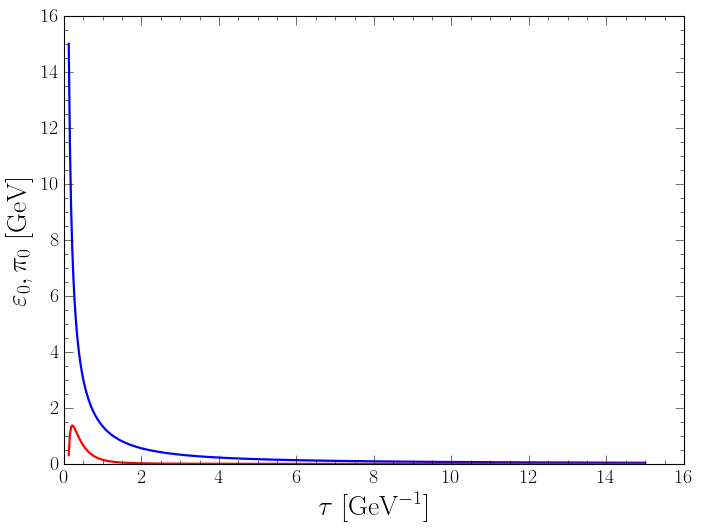

In [5]:
L = len(init_veps_0)
fig, ax = plt.subplots(L, L, figsize=(L*10,L*7))
fig.patch.set_facecolor('white')

for j, vep in enumerate(init_veps_0):
    for k, pi in enumerate(init_pi_0):
        #inital condiditions
        veps_0[0] = vep
        pi_0[0] = pi
        
        # calculate RK4 
        for i in range(1, steps):
            k1 = dveps_dtau(tau[i-1], veps_0[i-1], pi_0[i-1])
            l1 = dpi_dtau(tau[i-1], veps_0[i-1], pi_0[i-1])
            
            k2 = dveps_dtau(tau[i-1] + dtau / 2, veps_0[i-1] + k1 * dtau /2, pi_0[i-1] + l1 * dtau / 2)
            l2 = dpi_dtau(tau[i-1] + dtau / 2, veps_0[i-1] + k1 * dtau /2, pi_0[i-1] + l1 * dtau / 2)
            
            k3 = dveps_dtau(tau[i-1] + dtau / 2, veps_0[i-1] + k2 * dtau /2, pi_0[i-1] + l2 * dtau / 2)
            l3 = dpi_dtau(tau[i-1] + dtau / 2, veps_0[i-1] + k2 * dtau /2, pi_0[i-1] + l2 * dtau / 2)
            
            k4 = dveps_dtau(tau[i-1] + dtau, veps_0[i-1] + k3 * dtau, pi_0[i-1] + l3 * dtau)
            l4 = dpi_dtau(tau[i-1] + dtau, veps_0[i-1] + k3 * dtau, pi_0[i-1] + l3 * dtau)
            
            veps_0[i] = veps_0[i-1] + (k1 + 2*k2 + 2*k3 + k4) * dtau / 6 
            pi_0[i] = pi_0[i-1] + (l1 + 2*l2 + 2*l3 + l4) * dtau / 6
            
        if L > 1:    
            ax[j, k].plot(tau, veps_0, color='blue', lw=2)
            ax[j, k].plot(tau, pi_0, color='red', lw=2)
            ax[j, k].set_xlabel(r'$\tau$ [GeV$^{-1}$]', fontsize=25)
            ax[j, k].set_ylabel(r'$\varepsilon_0, \pi_0$ [GeV]', fontsize=25)
            ax[j, k].tick_params(axis='both', labelsize=18)
            ax[j, k].tick_params(axis='both', which='major', length=8)
            ax[j, k].xaxis.set_minor_locator(tck.AutoMinorLocator())
            ax[j, k].yaxis.set_minor_locator(tck.AutoMinorLocator())
            ax[j, k].tick_params(axis='both', which='minor', direction='in', length=4)
        else:
            ax.plot(tau, veps_0, color='blue', lw=2)
            ax.plot(tau, pi_0, color='red', lw=2)
            ax.set_xlabel(r'$\tau$ [GeV$^{-1}$]', fontsize=25)
            ax.set_ylabel(r'$\varepsilon_0, \pi_0$ [GeV]', fontsize=25)
            ax.tick_params(axis='both', labelsize=18)
            ax.tick_params(axis='both', which='major', length=8)
            ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
            ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
            ax.tick_params(axis='both', which='minor', direction='in', length=4)

In [36]:
?range

# Python adaptation of Mike's cpu_vah code

Planning phase:
1. Need to have input parameters: since this will start off as a Jupyter notebook, I will not store them in a separete file.
1. Translate hydrodynamic evolution code to python and cut out all the unnecessary Trento and freezeout surface stuff
1. Include an option to include both analytic solution and numberical solution for background evolution
1. Generate plots 

For now I will cut out all the code dealing with nonconformal systems

In [1]:
import sys

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

%matplotlib inline
plt.style.use('classic')

In [3]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

In [4]:
from hydro_simulation import Hydro_Sim, hydro_parameters, lattice_parameters
from hydro_model import Hydro_Model

In [5]:
# Hydro model to use
hydro_model = 1        # 1 - Mueller-Israel-Stewart Theory

In [6]:
# input parameters for hydro calculations
# =============================
''' Viscosity parameters '''
g_etas_aL       = -0.776   # a_low [GeV^-1],         default: -0.778
g_etas_aH       = 0.37     # a_high [GeV^-1]         default: 0.37
g_etas_Tk_GeV   = 0.223    # T_eta [GeV]             default: 0.223
g_etas_etask    = 0.096    # (eta/s)_kink            default: 0.096
g_etas_min      = 0.01     # lower cutoff (eta/s)(T) default: 0.01
g_constant_etas = 0.2      # value for eta/s = const defualt: 0.2
g_eta_bar       = 5 / (4 * np.pi)

''' Hydrodynamic parameters '''
g_tau_initial               = 0.125   # start time [fm/c]             default: 0.05
g_freezeout_temperature_GeV = 0.136   # stop temp [GeV]               default: 0.136
g_temperature_etas          = 1       # shear viscosity model
                                      # 0: const, 1: temperature dep  default: 1
g_energy_initial            = 15.     # initial energy density [GeV]  default: 15
g_shear_initial             = 0.314   # initial shear stress [GeV]    defautl: 0.314
g_energy_min                = 1.0e-1  # energy density cutoff [fm^-4] default: 1.e-1
g_flux_limiter              = 1.8     # flux limiter in KT algo       default: 1.8
g_regulation_scheme         = 1       # switch for regulation scheme  default: 1
g_dynamical_variables       = 14      # components of Tmn that evolve default: 14
                                      # number of components for hydro_variables class

''' Spatial grid and time step '''
g_lattice_points_x    = 129     # custum grid point Nx           default: 281
g_lattice_points_y    = 129     # costum grid point Ny           default: 281
g_lattice_points_eta  = 63      # costum grid point Neta         default: 1
g_lattice_spacing_x   = 0.1     # costum lattice spacing dx [fm] default: 0.1
g_lattice_spacing_y   = 0.1     # costum lattice spacing dy [fm] default: 0.1
g_lattice_spacing_eta = 0.1     # costum lattice space deta [1]  default: 0.1
g_adaptive_time_step  = 1       # switch for adaptive time step  
                                # 1: on, 0: off                  default: 1
g_delta_0             = 0.004   # control for adaptive time step default: 0.004 
g_alpha               = 0.5     # control for adaptive time step default: 0.5
g_fixed_time_step     = 0.0125  # value for dt = const [fm/c]    default: 0.0125
g_max_time_steps      = 2000    # code fails if exceeded         default: 2000

In [7]:
hydro = hydro_parameters(g_tau_initial,
                         g_energy_initial,
                         g_shear_initial,
                         g_freezeout_temperature_GeV,
                         g_energy_min,
                         g_flux_limiter,
                         g_regulation_scheme,
                         g_dynamical_variables,
                         g_temperature_etas,
                         g_eta_bar,
                         g_constant_etas,
                         g_etas_min,
                         g_etas_aL,
                         g_etas_aH,
                         g_etas_etask,
                         g_etas_Tk_GeV)

lattice = lattice_parameters(g_lattice_points_x,
                             g_lattice_points_y,
                             g_lattice_points_eta,
                             g_lattice_spacing_x,
                             g_lattice_spacing_y,
                             g_lattice_spacing_eta,
                             g_adaptive_time_step,
                             g_delta_0,
                             g_alpha,
                             g_fixed_time_step,
                             g_max_time_steps)

In [8]:
model = Hydro_Model(model_flag=1, eta_s=hydro.eta_bar)
sim = Hydro_Sim(hydro=hydro, lattice=lattice)

In [ ]:
%%time
sim.run_hydro(model)

Begin simulation.
Allocating memory.
Setting inital conditions.
Time step: 0
